A Survey on Technology Choice
======


HYPOTHESIS: I think that the priority will be affected by the repuation of the author. I have this stance because the author is generally important to people when answering a survey and trusting that person with their thoughts and opinions. If one does not trust the reputation of the author, they might not answer the questions completely.

In [2]:
library(MASS)
library(dplyr)
library(tidyr)
library(caret)
library(datasets)


Attaching package: 'dplyr'

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: ggplot2


In [3]:
# For nicer printing
options(digits=2);

In [4]:
# Read in the data
data <- read.csv("TechSurvey - Survey.csv",header=T);

#convert date to unix second
for (i in c("Start", "End")) 
    data[,i] = as.numeric(as.POSIXct(strptime(data[,i], "%Y-%m-%d %H:%M:%S")))
for (i in 0:12){
    vnam = paste(c("PG",i,"Submit"), collapse="")
    data[,vnam] = as.numeric(as.POSIXct(strptime(data[,vnam], "%Y-%m-%d %H:%M:%S")))
}
#calculate differences in time    
for (i in 12:0){
    pv = paste(c("PG",i-1,"Submit"), collapse="");
    if (i==0) 
        pv="Start";
    vnam = paste(c("PG",i,"Submit"), collapse="");
    data[,vnam] = data[,vnam] -data[,pv];
}

In [5]:
#now explore variables
summary(data);

     Device    Completed       Start               End               PG0Dis   
        :  2   0    :  2   Min.   :1.54e+09   Min.   :1.54e+09   Min.   :  0  
 Bot    :  1   FALSE:546   1st Qu.:1.54e+09   1st Qu.:1.54e+09   1st Qu.:  0  
 PC     :955   TRUE :805   Median :1.54e+09   Median :1.54e+09   Median :  1  
 Phone  :376               Mean   :1.54e+09   Mean   :1.54e+09   Mean   : 44  
 Tablet : 16               3rd Qu.:1.54e+09   3rd Qu.:1.54e+09   3rd Qu.: 24  
 Unknown:  3               Max.   :1.54e+09   Max.   :1.54e+09   Max.   :168  
                           NA's   :2          NA's   :548        NA's   :73   
    PG0Shown      PG0Submit    
 Min.   :   0   Min.   :    2  
 1st Qu.:   0   1st Qu.:    6  
 Median : 102   Median :    9  
 Mean   : 249   Mean   :  299  
 3rd Qu.: 428   3rd Qu.:   15  
 Max.   :1190   Max.   :76226  
 NA's   :73     NA's   :199    
                                       PG1PsnUse  
 For personal work and/or research use      :727  
          

### Interpret  basic summaries

In [6]:
#get numeric fields only for correlation
sel = c()
for (i in 1:dim(data)[2]) if (is.numeric(data[,i])) sel = c(sel, i);


cor(data[,sel],method="spearman",use="pairwise.complete.obs"); #OK for any: uses ranks

,Start,End,PG0Dis,PG0Shown,PG0Submit,PG1Submit,PG2Submit,PG3Submit,PG4Dtr0_6,PG4Psv7_8,...,PG5_12Order,PG5_13Order,PG5Submit,PG6Submit,PG7Submit,PG8Submit,PG9Submit,PG10Submit,PG11Submit,PG12Submit
Start,1.0000,0.9952,-0.0417,-0.11507,0.1350,0.1156,0.0791,0.0384,0.01210,0.00371,...,-0.0369,0.0598,0.08512,0.0054,0.0776,0.0441,0.04101,0.047,7.9e-02,0.0746
End,0.9952,1.0000,-0.0415,-0.09879,0.1142,0.1550,0.0791,0.0511,-0.05185,-0.04576,...,-0.0359,0.0661,0.09088,0.0051,0.0759,0.0435,0.04071,0.052,7.9e-02,0.0772
PG0Dis,-0.0417,-0.0415,1.0000,0.87220,0.0153,0.0065,0.0041,0.0567,0.16368,0.02668,...,0.0151,0.0384,0.00601,0.0277,0.0097,0.0354,0.00995,-0.029,-4.5e-02,0.0546
PG0Shown,-0.1151,-0.0988,0.8722,1.00000,0.0360,0.0205,0.0023,0.0497,0.08226,0.00036,...,0.0074,0.0407,-0.00888,0.0401,0.0121,0.0264,0.00056,-0.045,-7.1e-02,0.0436
PG0Submit,0.1350,0.1142,0.0153,0.03596,1.0000,0.1088,0.1037,0.1273,-0.00802,-0.03763,...,-0.0161,-0.0280,0.17671,0.1518,0.1365,0.1258,0.17579,0.225,1.1e-01,0.1096
PG1Submit,0.1156,0.1550,0.0065,0.02047,0.1088,1.0000,0.1452,0.2688,-0.06852,0.05661,...,0.0512,-0.0651,0.24670,0.2414,0.1133,0.1069,0.10895,0.170,7.4e-02,0.1137
PG2Submit,0.0791,0.0791,0.0041,0.00235,0.1037,0.1452,1.0000,0.2045,0.00146,0.00897,...,0.0210,-0.0047,0.21851,0.2696,0.1245,0.1567,0.20127,0.099,1.1e-01,0.1073
PG3Submit,0.0384,0.0511,0.0567,0.04968,0.1273,0.2688,0.2045,1.0000,0.00865,0.04424,...,0.0464,-0.0222,0.26048,0.2706,0.1316,0.1822,0.27450,0.161,1.4e-01,0.1642
PG4Dtr0_6,0.0121,-0.0518,0.1637,0.08226,-0.0080,-0.0685,0.0015,0.0087,1.00000,NA,...,0.1774,-0.1289,-0.05214,-0.1618,0.1560,0.0695,-0.07292,0.044,8.4e-04,-0.0272
PG4Psv7_8,0.0037,-0.0458,0.0267,0.00036,-0.0376,0.0566,0.0090,0.0442,NA,1.00000,...,-0.0008,-0.0218,0.08974,-0.0146,-0.0363,0.0526,0.05977,0.069,-4.9e-02,-0.0217


This function will filter the surveys to get the completed ones, and then will print the max, min, mean, median completion times. Also, I added the quartiles.


In [7]:
#Survey times, max time, min time, average survey time, median, qaurtiles of survey time
data_complete = filter(data, Completed == TRUE)
survey_time = data_complete$End - data_complete$Start
print(paste0("Survey time notable values: "))
print(paste0("Max time: ", max(survey_time), ' seconds'))
print(paste0("Min time: ", min(survey_time), ' seconds'))
print(paste0("Average time: ", round(mean(survey_time)), ' seconds'))
print(paste0("Median time: ", median(survey_time), ' seconds'))
cat("\n")
print(paste0("Quartiles: ", quantile(survey_time), ' seconds'))

[1] "Survey time notable values: "
[1] "Max time: 87551 seconds"
[1] "Min time: 51 seconds"
[1] "Average time: 680 seconds"
[1] "Median time: 225 seconds"

[1] "Quartiles: 51 seconds"    "Quartiles: 178 seconds"  
[3] "Quartiles: 225 seconds"   "Quartiles: 310 seconds"  
[5] "Quartiles: 87551 seconds"


This cell reads in the data and finds the longest and shortest average question times.

In [8]:
#Read in data of questions -- Read in the data  of each question into a variable
question0 <- data[,"PG0Submit"]
question1 <- data[,"PG1Submit"]
question2 <- data[,"PG2Submit"]
question3 <- data[,"PG3Submit"]
question4 <- data[,"PG4Submit"]
question5 <- data[,"PG5Submit"]
question6 <- data[,"PG6Submit"]
question7 <- data[,"PG7Submit"]
question8 <- data[,"PG8Submit"]
question9 <- data[,"PG9Submit"]
question10 <- data[,"PG10Submit"]
question11 <- data[,"PG11Submit"]
question12 <- data[,"PG12Submit"]

#get mean for each variable
means <- c()
means <- c(means, mean(question0, na.rm = TRUE))
means <- c(means, mean(question1, na.rm = TRUE))
means <- c(means, mean(question2, na.rm = TRUE))
means <- c(means, mean(question3, na.rm = TRUE))
means <- c(means, mean(question4, na.rm = TRUE))
means <- c(means, mean(question5, na.rm = TRUE))
means <- c(means, mean(question6, na.rm = TRUE))
means <- c(means, mean(question7, na.rm = TRUE))
means <- c(means, mean(question8, na.rm = TRUE))
means <- c(means, mean(question9, na.rm = TRUE))
means <- c(means, mean(question10, na.rm = TRUE))
means <- c(means, mean(question11, na.rm = TRUE))
means <- c(means, mean(question12, na.rm = TRUE))

#formatting and output
most_time = format(round(max(means), 2), nsmall = 2)
least_time = format(round(min(means), 2), nsmall = 2)
print(paste0("The question that took the longest time to complete was PG0 at: " ,most_time, " seconds"))
print(paste0("The question that took the least time to complete was PG11 at: " ,least_time, " seconds"))


[1] "The question that took the longest time to complete was PG0 at: 299.35 seconds"
[1] "The question that took the least time to complete was PG11 at: 6.37 seconds"


Gets the critical responses, filtered with my variable prefix PG5

In [9]:
#Get the critical responses --- Filter to see questions where my variable is
crit_responses = dplyr::select(data_complete, starts_with('PG5'), -ends_with('Time'), -ends_with('Order'), -ends_with('Submit')) 
print(summary(crit_responses))

           PG5_1RRPQ             PG5_2BNUI              PG5_3HDS  
                :335                  :381                  :225  
 Essential      : 59   Essential      :  3   Essential      :103  
 High Priority  :102   High Priority  : 25   High Priority  :199  
 Low Priority   : 85   Low Priority   :120   Low Priority   : 68  
 Medium Priority:130   Medium Priority: 91   Medium Priority:161  
 Not a Priority : 94   Not a Priority :185   Not a Priority : 49  
            PG5_4VGP              PG5_5PHR             PG5_6SSYOP 
                :311                  :213                  :310  
 Essential      : 22   Essential      : 79   Essential      : 61  
 High Priority  :109   High Priority  :247   High Priority  :136  
 Low Priority   : 87   Low Priority   : 63   Low Priority   : 83  
 Medium Priority:162   Medium Priority:160   Medium Priority:109  
 Not a Priority :114   Not a Priority : 43   Not a Priority :106  
           PG5_7NDYP              PG5_8CP               PG5_9F

Age distribution charts -- I used a bar plot and a pie chart

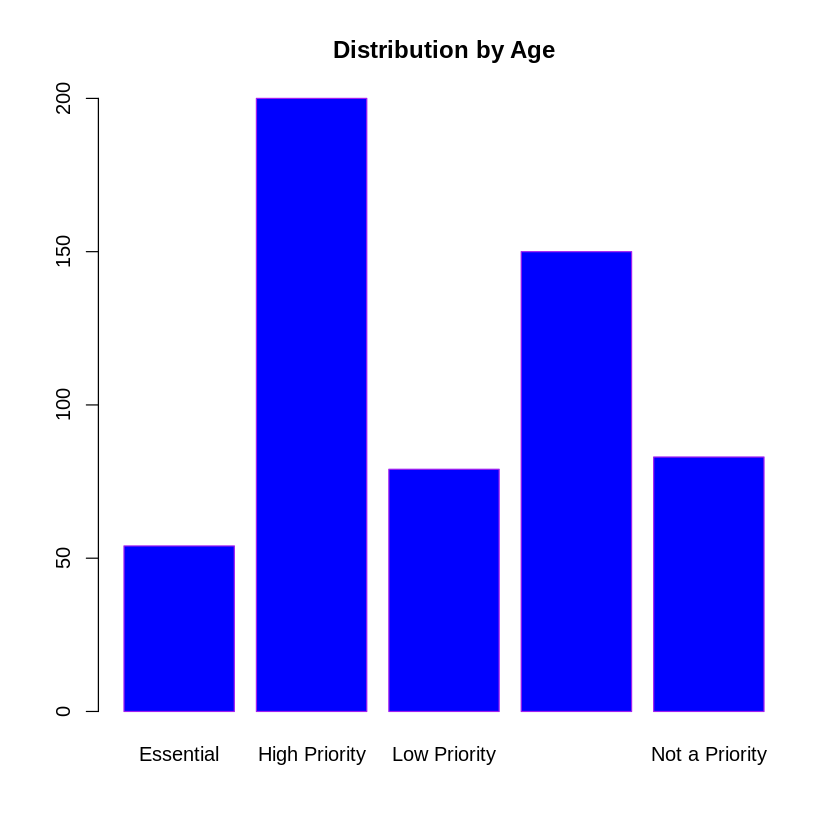

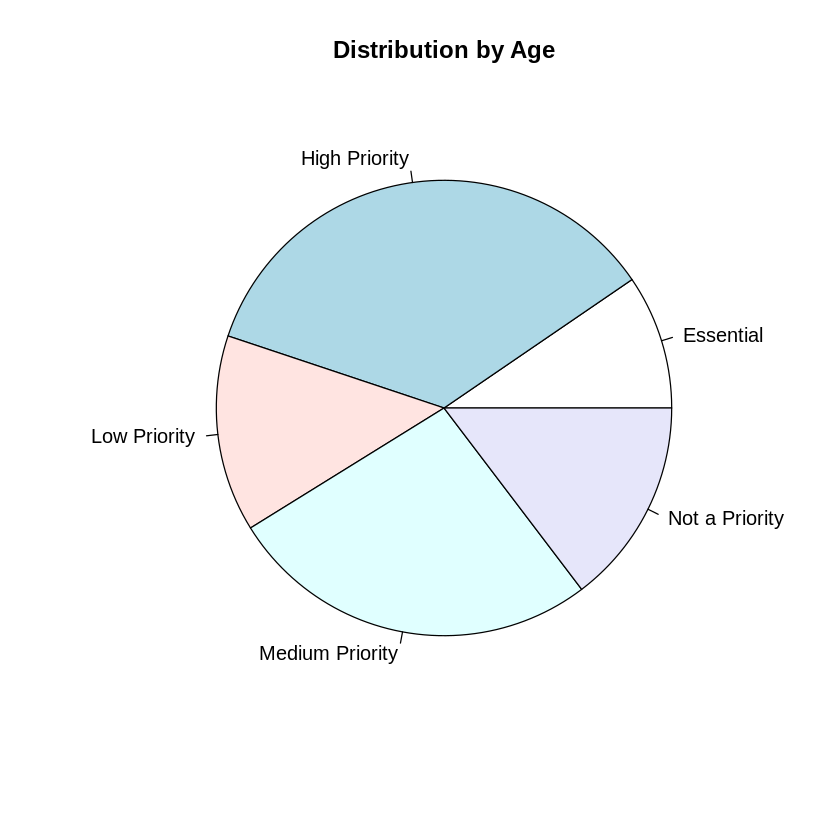

In [10]:
#Age distributions for my response -- FILTER bad responses
age = dplyr::select(data_complete, PG5_10RPA) %>%
    filter(PG5_10RPA != '')

age1 = factor(age[,])
#Bar plot
barplot(table(age1), main = 'Distribution by Age', border="purple", col="blue")
#pie chart
pie(table(age1), main = 'Distribution by Age')

Filter the responses by the most common for my question -- I filter N/A's here as well in my summary

In [11]:
set1 = c('Device' ,'Start','End','PG0Dis','PG0Shown','PG0Submit','PG1PsnUse','PG1Trn',
'PG1Submit' ,'PG2Resp','PG2Submit','PG2Resp.1' ,'PG3Submit' , 
'PG4AllResp','PG4Submit','PG5_1Order','PG5_1Time','PG5Submit','PG6Resp','PG6Submit','PG7R','PG7C.C..','PG7Java','PG7Python','PG7Javascript',
'PG7Go','PG7C.','PG7Other','PG7Submit','PG8Resp','PG8Submit','PG9Resp','PG9Submit','PG10Resp','PG10Submit',
'PG11Resp','PG11Submit','PG12Resp','PG12Submit')

set2 = c('Device' ,'Start','End','PG0Dis','PG0Shown','PG0Submit','PG1PsnUse','PG1Trn',
'PG1Submit' ,'PG2Resp','PG2Submit','PG2Resp.1' ,'PG3Submit' ,
'PG4AllResp','PG4Submit', 'PG5_10RPA',
'PG5_1RRPQ','PG5_1Time','PG5Submit','PG6Resp','PG6Submit','PG7R','PG7C.C..','PG7Java','PG7Python','PG7Javascript',
'PG7Go','PG7C.','PG7Other','PG7Submit','PG8Resp','PG8Submit','PG9Resp','PG9Submit','PG10Resp','PG10Submit',
'PG11Resp','PG11Submit','PG12Resp','PG12Submit')

df = dplyr::select(data_complete, set1) %>%
    na.omit()
print(summary(df))

df1 = dplyr::select(data_complete, set2) %>%
    na.omit()
print(summary(df1))
#Desired response model


     Device        Start               End               PG0Dis   
        :  0   Min.   :1.54e+09   Min.   :1.54e+09   Min.   :  0  
 Bot    :  0   1st Qu.:1.54e+09   1st Qu.:1.54e+09   1st Qu.:  0  
 PC     :323   Median :1.54e+09   Median :1.54e+09   Median :  1  
 Phone  : 88   Mean   :1.54e+09   Mean   :1.54e+09   Mean   : 45  
 Tablet :  5   3rd Qu.:1.54e+09   3rd Qu.:1.54e+09   3rd Qu.: 24  
 Unknown:  0   Max.   :1.54e+09   Max.   :1.54e+09   Max.   :168  
                                                                  
    PG0Shown      PG0Submit                                     PG1PsnUse  
 Min.   :   0   Min.   :    2   For personal work and/or research use:290  
 1st Qu.:   0   1st Qu.:    6                                        :120  
 Median : 118   Median :   10   Chapter book                         :  1  
 Mean   : 266   Mean   :   62   Learning how to create a package     :  1  
 3rd Qu.: 463   3rd Qu.:   16   Teaching                             :  1  
 Max.   

After filtering, here is a chart for the Author's reputation

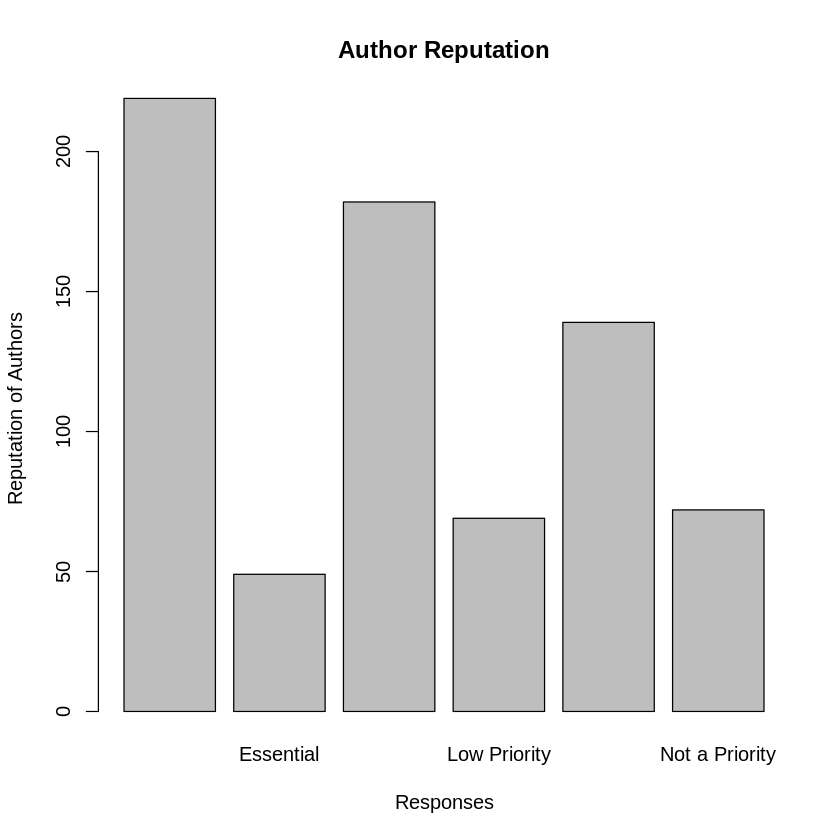

In [12]:
plot(df1$PG5_10RPA, main = "Author Reputation", ylab = "Reputation of Authors", xlab="Responses")

Remove levels of target factoring -- FILTER bad responses

In [13]:

df1 <- filter(df1, PG5_10RPA != '')
summary(df1$PG5_10RPA)
df1$PG5_1RRPQ <- factor(df1$PG5_10RPA)
summary(df1$PG5_10RPA)

Essential   High Priority    Low Priority Medium Priority 
              0              49             182              69             139 
 Not a Priority 
             72

Essential   High Priority    Low Priority Medium Priority 
              0              49             182              69             139 
 Not a Priority 
             72

Get correlations and mark those with high correlations

In [14]:
for(i in colnames(data))
{
    data[,i] <- as.numeric (data[,i]);
}
data <- replace(data, is.na(data), 0)

hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max) > level;
  res[sel,sel];
}
hiCor(data,.7)

,Completed,End,PG0Dis,PG0Shown,PG2Resp.1,PG3Submit,PG4Prm9_10,PG4AllResp,PG4Submit,PG5_1RRPQ,...,PG8Resp,PG8Submit,PG9Resp,PG9Submit,PG10Resp,PG10Submit,PG11Resp,PG11Submit,PG12Resp,PG12Submit
Completed,1.0000,0.880,-0.00957,0.01311,0.7359,0.743,0.5312,0.7652,0.7466,0.5703,...,0.8601,0.876,0.8601,0.8730,0.8783,0.8744,0.9081,0.8870,0.8518,0.885
End,0.8796,1.000,0.01515,0.01445,0.6558,0.665,0.4581,0.6643,0.6589,0.4681,...,0.7650,0.779,0.7672,0.7767,0.7727,0.7815,0.7923,0.7983,0.7624,0.796
PG0Dis,-0.0096,0.015,1.00000,0.89092,0.0078,0.024,-0.0093,-0.0013,-0.0270,-0.0058,...,-0.0139,0.014,-0.0022,0.0038,-0.0023,-0.0159,-0.0152,-0.0142,-0.0183,0.016
PG0Shown,0.0131,0.014,0.89092,1.00000,0.0259,0.046,-0.0033,0.0108,-0.0054,0.0073,...,0.0036,0.032,0.0207,0.0215,0.0078,-0.0014,0.0082,-0.0027,-0.0051,0.033
PG2Resp.1,0.7359,0.656,0.00778,0.02585,1.0000,0.729,0.4421,0.6674,0.6761,0.4281,...,0.6437,0.646,0.6600,0.6605,0.6571,0.6501,0.6915,0.6679,0.6479,0.668
PG3Submit,0.7431,0.665,0.02376,0.04597,0.7293,1.000,0.4383,0.6704,0.7515,0.4412,...,0.6479,0.697,0.6384,0.7170,0.6763,0.6923,0.6882,0.6910,0.6361,0.696
PG4Prm9_10,0.5312,0.458,-0.00930,-0.00333,0.4421,0.438,1.0000,0.8805,0.3759,0.3202,...,0.4155,0.414,0.4802,0.4521,0.4275,0.4181,0.4785,0.4332,0.4488,0.444
PG4AllResp,0.7652,0.664,-0.00132,0.01079,0.6674,0.670,0.8805,1.0000,0.6667,0.4527,...,0.6354,0.645,0.6801,0.6722,0.6630,0.6549,0.6942,0.6545,0.6465,0.659
PG4Submit,0.7466,0.659,-0.02698,-0.00543,0.6761,0.752,0.3759,0.6667,1.0000,0.4491,...,0.6742,0.705,0.6338,0.7399,0.7324,0.7516,0.6934,0.7248,0.6395,0.715
PG5_1RRPQ,0.5703,0.468,-0.00579,0.00730,0.4281,0.441,0.3202,0.4527,0.4491,1.0000,...,0.4874,0.498,0.4910,0.5072,0.4857,0.4869,0.5148,0.4964,0.4683,0.505


Fitting model with regression, coefficients, too much correlation, etc. detailed in output

In [15]:
sel = c() 
for (i in 1:dim(data)[2]) if (is.numeric(data[,i])) sel = c(sel, i);
cor(data[,sel], data[,'PG5_10RPA'], method="spearman",use="pairwise.complete.obs");
model <- lm(PG5_10RPA ~ ., data = data)
summary(model)

Device,-0.1039
Completed,0.6534
Start,0.0014
End,0.5857
PG0Dis,-0.0010
PG0Shown,-0.0069
PG0Submit,0.2542
PG1PsnUse,0.2441
PG1WdAuth,0.1244
PG1Trn,0.1019
PG1Other,0.0989



Call:
lm(formula = PG5_10RPA ~ ., data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-2.702 -0.300 -0.016  0.143  3.419 

Coefficients: (1 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -2.35e+02   1.02e+02   -2.31  0.02124 *  
Device        -1.02e-01   4.68e-02   -2.18  0.02920 *  
Completed      2.35e+02   1.02e+02    2.31  0.02084 *  
Start         -1.53e-07   6.61e-08   -2.31  0.02096 *  
End           -1.53e-07   6.61e-08   -2.31  0.02092 *  
PG0Dis        -1.53e-04   4.64e-04   -0.33  0.74193    
PG0Shown      -3.34e-05   1.04e-04   -0.32  0.74916    
PG0Submit     -4.03e-06   6.74e-06   -0.60  0.55054    
PG1PsnUse      2.03e-02   2.10e-02    0.97  0.33296    
PG1WdAuth     -4.94e-02   3.33e-02   -1.48  0.13860    
PG1Trn        -4.96e-02   7.51e-02   -0.66  0.50867    
PG1Other       1.21e-03   3.19e-03    0.38  0.70380    
PG1Submit     -9.22e-05   1.01e-04   -0.92  0.35920    
PG2Resp       -5.12e-03   2.

In turns out that my hypothesis was correct and the reputation of the author does in fact matter to survey takers. To do this, it consisted of parsing data and then interpreting it. Using R functions like select(), filter(), and reading into models I was able to handle the data. Above each of my code cells is a cell with a short but 'to the point' description of each required aspect of the project, along with the required output below.  

Interpret correlations: onlys start vs End, calculate differene instead


### Simple questions

- Time to take entire survey?
- Question that took the longest to complete?
- Question that took the least time?
- Top-ranked criteria?
- Demographic distribution by age?